# Empirische Analyse

Weiß man zu wenig über den Entwurf eines (z.B. als ausführbares Programm) vorliegenden Algorithmus', so ist es oft nicht möglich, dessen Aufwand mit analytischen Methoden zu bestimmen. Dann hilft eine *empirische Analyse*. Dabei misst man, wie lange der Algorithmus zur Berechnung der gesuchten Resultate benötigt, und versucht einen funktionalen Zusammenhang $T: n\mapsto T(n)$ herauszufinden.  

Die empirische Analyse macht es notwendig, $k$ Messungen mit unterschiedlichen Eingaben gleicher Größe $n$ durchzuführen. Man betrachtet verschiedene Probleminstanzen, z.B. $k=10$, für jeden betrachteten Wert ein und dieselben Problemgröße, z.B. $n=100,1000,10000,100000,1000000$. 

Zur Auswertung kann man für jedes $n$ das arithmetische Mittel der $k$ vorlegenden Messwerte, nehmen. Dies liefert den Aufwand im *mittleren Fall* (average case). Nimmt man den jeweils größten/kleinsten Wert, ergibt sich der Aufwand im *schlechtesten* bzw. *besten* Fall (worst/best case).

Zur grafischen Darstellung kann man die gemittelten Werte in einem Streudiagramm (scatter plot) eintragen.

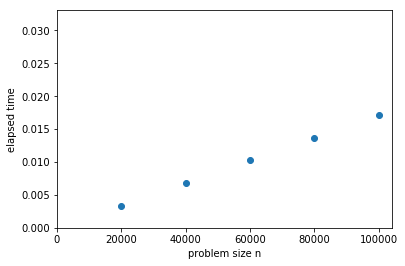

In [1]:
import random
import statistics
import time
import matplotlib.pyplot as plt


def find_minimum(lst):
    min_so_far = float('inf')
    for n in lst:
        min_so_far = min(min_so_far, n)
    return min_so_far


def get_random_lst(size, min_value=0, max_value=100000):
    lst = []
    for i in range(size):
        lst.append(random.randint(min_value, max_value))
    return lst


def measure_time(algorithm):
    def helper(*args):
        start = time.clock()
        algorithm(*args)
        return time.clock() - start

    return helper


x = list(map(lambda n: 2 * n * 10 ** 4, list(range(1, 6))))
y = list(map(lambda x: statistics.median(list(map(lambda _: measure_time(find_minimum)(get_random_lst(x)), range(5)))), x))

plt.scatter(x, y)
plt.xlabel('problem size n')
plt.ylabel('elapsed time')
plt.xlim(left=0)
plt.ylim(bottom=0)
plt.show()

## Regression

Ein solches Streudiagramm lässt den funktionalen Zusammenhang oft schon erahnen. Besser ist es, wenn wir objektiv(!), d.h. mit mathematischen Mitteln, eine Funktion bestimmen, die den Zusammenhang zwischen $n$ und $T(n)$ ausdrückt. Dies entspricht dem Hineinlegen einer Kurve, die dem Punkteverlauf möglichst gut entspricht und Ausreißer geeignet verarbeitet. 

Diese Technik wird Regression genannt. Am besten ist es, wenn man eine Gerade verwenden kann. Man spricht von *linearer Regression*. Dies gilt zunächst natürlich nur für lineare Zusammenhänge zwischen $n$ und $T(n)$. Vermutet man eine Polynom- oder Exponentialfunktion, so kann man die Messwerte in vielen Fällen so aufbereiten (umrechnen), dass die daraus gewonnenen Daten durch eine lineare Funktion approximiert werden können. Eine entsprechende Rückrechnung liefert dann die konkreten Koeffizienten der gesuchten Funktion. 

### Lineare Regression

Wie oben angekündigt, suchen wir eine lineare Funktion, die als Gerade die Punkte möglichst gut annähert.

Eine lineare Funktion $f$ ist wie folgt definiert:

$$
f(x) = a \cdot x + b \text{ mit $a, b \in \mathbb{R}$}
$$

Nun geht es darum, $a$ und $b$ so zu wählen, dass der Verlauf der Gerade möglichst gut mit dem Verlauf der Punkte übereinstimmt. Hierfür wird die Methode der kleinsten Qudrate (nach Gauss) angewandt: Die Summe der Abstandsquadrate aller Punkte von der Geraden soll möglichst klein sein (Optimierungsziel). Dass dabei die einzelnen Abstandswerte quadriert werden müssen, liegt daran, dass zur Bestimmung des Minimums die erste Ableitung der Abstandsfunktion gebildet wird. Diese ist an der Stelle $x=0$ nicht differenzierbar, nimmt man die Quadrate, dann schon.

<img src="http://cs.wellesley.edu/~cs199/lectures/line-fit-errors.png" width="300">

- $x_i$ : $x$-Wert des $i$-ten Punktes
- $y_i$ : $y$-Wert des $i$-ten Punktes

$$
e(a, b) = \sum_{i=1}^n (a \cdot x_i + b - y_i)^2
$$

Das Minimum lässt sich analytisch bestimmen, indem man die partiellen Ableitungen von $e(a, b)$ bildet und diese gleich 0 setzt.

$$
\begin{align*}
e(a, b) & = \sum_{i=1}^n (a x_i + b)^2 - 2 \cdot (a x_i + b) \cdot y_i + y_i^2 \\
& = \sum_{i=1}^n a^2 x_i^2 + 2 a x_i b + b^2 - 2 a x_i y_i - 2 b y_i + y_i^2 \\
\frac{\partial e(a, b)}{\partial a} & = \sum_{i=1}^n 2 x_i^2 a + 2 x_i b - 2 x_i y_i \\
& = 2 \sum_{i=1}^n x_i^2 a + x_i b - x_i y_i \\
& = 2 \left( \sum_{i=1}^n x_i^2 a + \sum_{i=1}^n x_i b - \sum_{i=1}^n x_i y_i \right) \\
& = 2 \left( a \sum_{i=1}^n x_i^2 + b \sum_{i=1}^n x_i - \sum_{i=1}^n x_i y_i \right) \\
\frac{\partial e(a, b)}{\partial b} & = \sum_{i=1}^n 2 a x_i + 2 b - 2 y_i \\
& = 2 \sum_{i=1}^n a x_i + b - y_i \\
& = 2 \left( \sum_{i=1}^n a x_i + \sum_{i=1}^n b - \sum_{i=1}^n y_i \right) \\
& = 2 \left( a \sum_{i=1}^n x_i + n b - \sum_{i=1}^n y_i \right) \\
\end{align*}
$$

Nun müssen die partiellen Ableitungen gleich 0 gesetzt werden.

Im folgenden werden $\overline{x}$ als das arithmetische Mittel von $x$ : $\overline{x} = \frac{\sum_{i=1}^n x_i}{n}$ und $\overline{y}$ als das arithmetische Mittel von $y$ : $\overline{y} = \frac{\sum_{i=1}^n y_i}{n}$ bezeichnet.

$$
\left\{ 
\begin{array}{c}
\begin{align*}
2 \left( a \sum_{i=1}^n x_i^2 + b \sum_{i=1}^n x_i - \sum_{i=1}^n x_i y_i \right) & = 0 \\
2 \left( a \sum_{i=1}^n x_i + n b - \sum_{i=1}^n y_i \right) & = 0
\end{align*}
\end{array}
\right. 
$$

$$
\left\{ 
\begin{array}{c}
\begin{align*}
a \sum_{i=1}^n x_i^2 + b \sum_{i=1}^n x_i - \sum_{i=1}^n x_i y_i & = 0 \\
a \sum_{i=1}^n x_i + n b - \sum_{i=1}^n y_i & = 0
\end{align*}
\end{array}
\right. 
$$

$$
\left\{ 
\begin{array}{c}
\begin{align*}
a \sum_{i=1}^n x_i^2 + b \sum_{i=1}^n x_i & = \sum_{i=1}^n x_i y_i \\
a \sum_{i=1}^n x_i + nb & = \sum_{i=1}^n y_i
\end{align*}
\end{array}
\right. 
$$

$$
a \sum_{i=1}^n x_i + nb = \sum_{i=1}^n y_i \\
\iff b = \frac{\sum_{i=1}^n y_i - a \sum_{i=1}^n x_i}{n} \iff b = \overline{y} - a \overline{x} \\
\implies a \sum_{i=1}^n x_i^2 + \frac{\sum_{i=1}^n y_i - a \sum_{i=1}^n x_i}{n} \sum_{i=1}^n x_i = \sum_{i=1}^n x_i y_i \\
\iff a \sum_{i=1}^n x_i^2 + \frac{\sum_{i=1}^n x_i \sum_{i=1}^n y_i}{n} - a \frac{\left( \sum_{i=1}^n x_i \right)^2}{n} = \sum_{i=1}^n x_i y_i \\
\iff a \sum_{i=1}^n x_i^2 - a \frac{\left( \sum_{i=1}^n x_i \right)^2}{n} = \sum_{i=1}^n x_i y_i - \frac{\sum_{i=1}^n x_i \sum_{i=1}^n y_i}{n} \\
\iff a \left( \sum_{i=1}^n x_i^2 - \frac{\left( \sum_{i=1}^n x_i \right)^2}{n} \right) = \sum_{i=1}^n x_i y_i - \frac{\sum_{i=1}^n x_i \sum_{i=1}^n y_i}{n} \\
\iff a = \frac{\sum_{i=1}^n x_i y_i - \frac{\sum_{i=1}^n x_i \sum_{i=1}^n y_i}{n}}{\sum_{i=1}^n x_i^2 - \frac{\left( \sum_{i=1}^n x_i \right)^2}{n}} \\
\iff a = \frac{\sum_{i=1}^n x_i y_i - \frac{n \cdot \overline{x} \cdot n \cdot \overline{y}}{n}}{\sum_{i=1}^n x_i^2 - \frac{n \cdot \overline{x} \cdot n \cdot \overline{x}}{n}} \\
\iff a = \frac{\sum_{i=1}^n x_i y_i - n \cdot \overline{x} \cdot \overline{y}}{\sum_{i=1}^n x_i^2 - n \cdot \overline{x}^2}
$$

Nun hat man mit 

$$
a = \frac{\sum_{i=1}^n x_i y_i - n \cdot \overline{x} \cdot \overline{y}}{\sum_{i=1}^n x_i^2 - n \cdot \overline{x}^2}
$$ 

und 

$$
b = \overline{y} - a \overline{x}
$$ 

Formeln, mit denen man die beiden Koeffizienten der linearen Funktion bestimmen kann.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/3/3a/Linear_regression.svg/1200px-Linear_regression.svg.png" width="350">

### Exponentielle Regression

Bei der exponentiellen Regression möchte man eine Exponentialfunktion finden, die sich möglichst gut an die gegebenen Punkte anschmiegt. Dieses Problem lässt sich auf das Problem eine lineare Funktion zu finden reduzieren, indem man die y-Achse logarithmisch anlegt. Nun verläuft die Kurve geradlinig, wenn sie eine Exponentialfunktion darstellt. Deshalb lässt sich das bereits bekannte Verfahren der linearen Regression anwenden.

Wählt man als Basis 2, so möchte man eine Funktion der Form $f(x) = a \cdot 2^{bx}$ finden. Logarithmiert man den Funktionwert, so erhält man: 

$$
\begin{align*}
\log_2 \left(f(x) \right) & = \log_2 \left(a \cdot 2^{bx} \right) \\
& = \log_2 a + \log_2 2^{bx} \\
& = \log_2 a + bx
\end{align*}
$$

Es handelt sich um eine lineare Funktion und $b$ und $\log_2 a$ lassen sich wie oben beschrieben bestimmen.


### Polynomielle Regression

Bei der polynomiellen Regression möchte man eine Funktion der Form $f(x) = a \cdot x^k$ finden, die die Punkte möglichst gut annähert. Nun müss die Kombination aus $a$ und $k$ gefunden werden, für die der Fehler minimal ist.

Hierfür wird wieder das Logarithmieren der Achsen benutzt. Jedoch wird hier nicht nur die y-Achse, sondern auch die x-Achse logarithmiert. Die Basis des Logarithmus ist egal, es muss sich allerdings bei der x- und y-Achse um die gleiche Basis handeln.

__Beispiele:__

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/9/92/LogLog_exponentials.svg/512px-LogLog_exponentials.svg.png" width="300">

Durch Logarithmieren der y-Achse erhält man:

$$
\begin{align*}
f(x) &= a \cdot x^k \\
\implies \log(f(x)) &= \log(a \cdot x^k) \\
\implies \log(f(x)) &= k \log(x) + \log(a)
\end{align*}
$$

Setzt man nun die x-Achse (mit $x'$ gekennzeichnet) $x' = \log(x)$, so erhält man eine Gerade. $\log(a)$ gibt den y-Achsenschnittpunkt und $k$ den Anstieg der Geraden an.

Nun kann man wie bei der linearen Regression vorgehen und $k$ und $\log(a)$ bestimmen.

### Korrelationskoeffizient

Der Pearson-Korrelationskoeffizient $r$ ist ein Maß für die Beziehung zwischen zwei Variablen. Im Zusammenhang der linearen Regression kann er genutzt werden, um die Qualität der Regressiongerade zu bestimmen.

$$
r = \frac{cov(X, Y)}{\sigma_X \sigma_Y}
$$

$cov(X, Y)$ ist die Kovarianz von $X$ und $Y$ und wird folgendermaßen bestimmt:
$$
cov(X, Y) = \frac{1}{n} \sum_{i=1}^n (x_i - \overline{x}) (y_i - \overline{y})
$$

Eingesetzt ergibt sich für $r$ folgende Formel:

$$
r = \frac{\frac{1}{n} \sum_{i=1}^n (x_i - \overline{x}) (y_i - \overline{y})}{\sqrt{\frac{1}{n} \sum_{i=1}^n (x_i - \overline{x})^2} \sqrt{\frac{1}{n} \sum_{i=1}^n (y_i - \overline{y})^2}}
$$

$$
r = \frac{\sum_{i=1}^n (x_i - \overline{x}) (y_i - \overline{y})}{\sqrt{\sum_{i=1}^n (x_i - \overline{x})^2} \sqrt{\sum_{i=1}^n (y_i - \overline{y})^2}}
$$

Laut der Cauchy-Schwartzen Ungleichung gilt:

$$
\left| \sum_{i=1}^n (x_i - \overline{x}) (y_i - \overline{y}) \right|^2 \leqslant \sum_{i=1}^n (x_i - \overline{x})^2 \sum_{i=1}^n (y_i - \overline{y})^2 \implies \sum_{i=1}^n (x_i - \overline{x}) (y_i - \overline{y}) \leqslant \sqrt{\sum_{i=1}^n (x_i - \overline{x})^2} \sqrt{\sum_{i=1}^n (y_i - \overline{y})^2} \implies \left| r \right| \leqslant 1 \implies -1 \leqslant r \leqslant 1
$$

# Lösen von Rekurrenzgleichungen

Viele Algorithmen basieren auf Rekursion. Dann folgt der Zeitaufwand der rekursiven Berechnungsvorschrift des gesuchten Resultats. Für die Effizienzanalyse solcher Algorithmen benötigen wir ein Verfahren, mit dem rekursive Gleichungen (Rekurrenzgleichungen) gelöst werden können.

Ein typisches Beispiel ist die Fibonacci-Folge: $0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55,\ldots$.

Die Bildungsvorschrift der $n$-ten Fibonacci-Zahl lässt sich sehr leicht angegeben, wenn dies rekursiv geschieht:

$$
\begin{align}
fib(0) & = 0 \\
fib(1) & = 1 \\
fib(n) & = fib(n - 1) + fib(n - 2) \mid n \geqslant 2
\end{align}
$$

Die $n$-te Fibonacci-Zahl ist gleich der Summe der zwei vorhergehenden Zahlen.

In [2]:
def fib(n):
    if n == 0:
        return 0
    if n == 1:
        return 1
    return fib(n-1) + fib(n-2)

print(list(map(fib, list(range(0, 20)))))

[0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377, 610, 987, 1597, 2584, 4181]


Der Zeitaufwand lässt sich ebenfalls durch eine rekursive Gleichung ausdrücken:

$$
\begin{align}
T(0) & = 0 \\
T(1) & = 1 \\
T(n) & = T(n - 1) + T(n - 2), n\geqslant 2
\end{align}
$$

Für $T$ benötigen wir einen Ausdruck in $n$ allerdings ohne $T(i)$ auf der rechten Seite. Gibt es ein Verfahren, um aus der (leicht erkennbaren) rekursiven Definition eine explizite zu gewinnen.

In der Tat gibt es sogar mehrere solcher Verfahren, die das Gewünschte mehr oder weniger erfolgreich leisten.

## Raten und Einsetzen

Eine solche Lösungsmethode ist das __Intelligent guesswork__ - das geschickte Raten. Hierfür stellt man eine Wertetabelle für $T(n)$ auf und versucht daraus eine explizite Bildungsvorschrift zu erkennen.

__Beispiel__

$$
\begin{align}
T(1) & = 1 \\
T(n) & = 3 \cdot T \left(\frac{n}{2} \right) + n
\end{align}
$$

$n$ sei hierbei eine Zweierpotenz, d.h. $n = 2^k$ mit $k \in \mathbb{N}$.

Für die Implementierung mit Python verwenden wir die pandas-Bibliothek zur Verwaltung und Analyse von Daten.

In [3]:
import pandas as pd

def T(n):
    if n == 1:
        return 1
    return 3 * T(n/2) + n


args = list(map(lambda n: 2**n, list(range(1, 8))))

print(pd.DataFrame({'T(n)': pd.Series(map(T, args), index=args, dtype=int)}))

     T(n)
2       5
4      19
8      65
16    211
32    665
64   2059
128  6305


Gibt man zusätzlich zu den Funktionswerten die Summendarstellungen an, ergibt sich folgende Wertetabelle:

|$n$|$T(n)$|
|---:|---:|
|$1$|$1$|
|$2$|$5=3 \cdot 1 + 2$|
|$4$|$19=3^2 \cdot 1 + 3 \cdot 2 + 2^2$|
|$8$|$65=3^3 \cdot 1 + 3^2 \cdot 2 + 3 \cdot 2^2 + 2^3$|
|$16$|$211=3^4 \cdot 1 + 3^3 \cdot 2 + 3^2 \cdot 2^2 + 3 \cdot 2^3 + 2^4$|
|$32$|$665=3^5 \cdot 1 + 3^4 \cdot 2 + 3^3 \cdot 2^2 + 3^2 \cdot 2^3 + 3 \cdot 2^4 + 2^5$|

Mit Hilfe dieser Summendarstellung lässt sich ein gewisses Muster erkennen, dadurch kann die Lösung "erraten" werden.

$$
\begin{align*}
T(2^k) & = 3^k \cdot 2^0 + 3^{k-1} \cdot 2^1 + ... + 3^1 \cdot 2^{k-1} + 3^0 \cdot 2^k \\
 & = \sum_{i=0}^{k}(3^{k-i} \cdot 2^i) \\
 & = 3^k \sum_{i=0}^k \left(\frac{2}{3} \right)^i \\
 & = 3^k \frac{1- \left(\frac{2}{3}^{k+1} \right)}{1-\frac{2}{3}} \\
T(2^k) & = 3^{k+1} - 2^{k+1}
\end{align*}
$$

Um eine Funktion $n \mapsto T(n)$ zu erhalten, muss $k$ durch $\log_2 n$ ersetzt werden.

$$
\begin{align*}
T(n) & = 3^{\log_2 n + 1} - 2^{\log_2 n + 1} \\
 & = 3^{\log_2 n} \cdot 3^1 - 2^{\log_2 n} \cdot 2^1 \\
 & = 3 \cdot 3^{\log_2 n} - 2 \cdot 2^{\log_2 n} \\
T(n) & = 3 \cdot n^{\log_2 3} - 2 \cdot n
\end{align*}
$$

Um die asymptotische Aufwandsordnung anzugeben, können der Summand $-2n$ und der Faktor $3$ vernachlässigt werden. Dies ergibt $\mathcal{O}(n^{\log_2 3})$.

## Iterationsmethode

Bei der __Iterationsmethode__ wird eine rekursive Vorschrift solange angewandt, bis man zu einem rekursionsfreien Ausdruck gelangt. Dies geschieht durch wiederholtes Einsetzen der rekursiven Funktionsaufrufe. Diese Expansion durch Selbstanwendung wird __Telescoping__ genannt.

Hat man eine rekursive Funktion $n\mapsto T(n)$ und setzt man für $n$ einen konkreten Wert ein, so kann problemlos Telescoping angewandt werden, da in endlich vielen Schritten die Elementarfälle erreicht werden und ein rekursionsfreier Ausdruck entsteht. Möchte man aber eine rekursive Funktion $n\mapsto T(n)$ für ein allgemeines $n$ mit Hilfe der Iterationsmethode lösen, so ist ein mathematischer Zwischenschritt nötig.

__Beispiel__

$$
\begin{align*}
T(1) & = 1 \\
T(n) & = 2 \cdot T \left(\frac{n}{4} \right) + n
\end{align*}
$$

Die Gleichung wird nun schrittweise expandiert:

$$
\begin{align*}
T(n) & = 2 \cdot T \left(\frac{n}{4} \right) + n \\
 & = 2 \cdot \left(2 \cdot T \left(\frac{n}{16} \right) + \frac{n}{4} \right) + n \\
 & = 4 \cdot T \left(\frac{n}{16} \right) + \frac{3}{2}n \\
 & = 4 \cdot \left(2 \cdot T \left(\frac{n}{64} \right) + \frac{n}{16} \right) + \frac{3}{2}n \\
 & = 8 \cdot T \left(\frac{n}{64} \right) + \frac{7}{4}n \\
 & = 8 \cdot \left(2 \cdot T \left(\frac{n}{256} \right) + \frac{n}{64} \right) + \frac{7}{4}n \\
 & = 16 \cdot T \left(\frac{n}{256} \right) + \frac{15}{8}n \\
\end{align*}
$$

Es wird ein gewisses Muster für den gesuchten, $T(n)$ definierenden Ausdruck ersichtlich, welches sich mit einer Variable $i$ mit $i\geqslant 1$ ausdrücken lässt.

$$
\begin{align*}
T(n) & = 2^i \cdot T \left(\frac{n}{4^i} \right) + \frac{2^i - 1}{2^{i-1}} \cdot n \\
\end{align*}
$$

Nun muss $i$ so gewählt werden, dass aus $T\left(\frac{n}{4^i}\right)$ ein rekursionsfreier Ausdruck ensteht, d.h. der Elementarfall erreicht ist. Dies geschieht mit $i = \log_4 n$ bei $T(1)$:

$$
\begin{align*}
T\left(\frac{n}{4^i}\right) & = T(1) \\
\frac{n}{4^i} & = 1 \\
n & = 4^i \\
i & = \log_4 n
\end{align*}
$$

Wir setzen $\log_4 n$ für $i$ in dem oben für $T(n)$ angegebenen "Musterausdruck" ein:

$$
\begin{align*}
T(n) & = 2^{\log_4 n} \cdot T \left(\frac{n}{4^{\log_4 n}} \right) + \frac{2^{\log_4 n} - 1}{2^{\log_4 n - 1}} \cdot n \\
 & = n^{\log_4 2} \cdot T(1) + \frac{n^{\log_4 2} - 1}{\frac{2^{\log_4 n}}{2}} \cdot n \\
 & = n^{\log_4 2} \cdot T(1) + \frac{n^{\log_4 2} - 1}{\frac{n^{\log_4 2}}{2}} \cdot n \\
 & = n^{\frac{1}{2}} \cdot T(1) + \frac{n^{\frac{1}{2}} - 1}{\frac{n^{\frac{1}{2}}}{2}} \cdot n \\
 & = n^{\frac{1}{2}} + \frac{2n^{\frac{1}{2}} - 2}{n^{\frac{1}{2}}} \cdot n \\
 & = n^{\frac{1}{2}} + \frac{2n^{\frac{3}{2}} - 2n}{n^{\frac{1}{2}}} \\
 & = n^{\frac{1}{2}} + \frac{2n^{\frac{3}{2}} - 2n}{n^{\frac{1}{2}}} \\
 & = n^{\frac{1}{2}} + 2n - 2n^\frac{1}{2} \\
T(n) & = 2n - n^\frac{1}{2}
\end{align*}
$$

Interessiert man sich nur für die asymptotische Aufwandsordnung, so liegt mit $T(n) \in \mathcal{O}(n)$ ein linearer Zusammenhang vor.

## Meistermethode (Master method)

Die __Meistermethode__ bietet eine Möglichkeit, die asymptotische Aufwandsordnung für [Divide and Conquer-Algorithmen](/notebooks/Documents/algorithmen-und-komplexitaet/08%20-%20Divide%20and%20Conquer.ipynb) anzugeben. Der Zeitaufwand von Divide and Conquer-Algorithmen lässt sich in der Form $T(n) = a \cdot T \left(\frac{n}{b} \right) + f(n)$ angeben. 

__Beispiel__

Für $T(n) = 2 \cdot T \left(\frac{n}{4} \right) + n$ lassen sich $a$, $b$ und $f(n)$ folgendermaßen angeben:
$$
\begin{align}
a & = 2 \\
b & = 4 \\
f(n) & = n
\end{align}
$$

<div class="general-text">
Nun muss man versuchen, den Ausdruck in einen der folgenden drei Fälle einzuordnen. Wenn dies gelingt, ergibt sich die Lösung unmittelbar aus der Variablenbindung. Wenn nicht, ist die Mastermethode zur Lösung der vorliegenden Rekurrenzgleichung nicht anwendbar.
</div>

__Definition 2.1 (Master Theorem)__

### Fall 1

Wenn $f(n) \in \mathcal{O} \left(n^{\log_b a - \epsilon} \right)$ mit $\epsilon > 0$, dann $T(n) \in \Theta \left(n^{\log_b a} \right)$.

Der größte Aufwand besteht hier im Teilen in Subprobleme, die Rekursion ist somit wurzellastig (root-heavy).

### Fall 2

Wenn $f(n) \in \Theta \left(n^{\log_b a} \right)$, dann $T(n) \in \Theta \left(n^{\log_b a}\log n \right)$.

Der Aufwand zum Rekombinieren der gelösten Subprobleme ist gleichwertig mit dem des Teilens.

### Fall 3

Wenn $f(n) \in \Omega \left(n^{\log_b a + \epsilon} \right)$ mit $\epsilon > 0$, dann $T(n) \in \Theta(f(n))$.

In diesem Fall liegt der größte Aufwand im Rekombinieren, die Rekursion ist also blattlastig (leaf-heavy).

__Beispiel__

Für das oben angegebene Beispiel gilt Fall 3 des Master Theorems:

$f(n) = n \in \Omega \left(n^{\log_b a + \epsilon} \right) \implies f(n) \in \Omega \left(n^{\log_4 2 + \epsilon} \right) \implies f(n) \in \Omega \left(n^{\frac{1}{2} + \epsilon} \right)$ mit $\epsilon=\frac{1}{2} > 0$.

Folglich gilt für die Aufwandsordnung $T(n)\in\Theta(f(n)) \implies T(n)\in\Theta(n)$.